In [ ]:
df2 = df.dropna()

In [ ]:
df['numeric_sex'] = df.sex.replace({'Female','Male'},{0,1})

In [ ]:
from statsmodels.formula.api import logit

In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1.0


In [ ]:
import sklearn

logit_model = logit(
    formula='numeric_sex ~ flipper_length_mm + body_mass_g + bill_length_mm	+ bill_depth_mm + C(species) + C(island)',
    data=df
).fit()
logit_model.pred_table()

Optimization terminated successfully.
         Current function value: 0.189260
         Iterations 9


array([[155.,  13.],
       [ 12., 153.]])

In [ ]:
b =logit_model.predict(df[sex_null]).round()
b

3      NaN
8      1.0
9      0.0
10     1.0
11     1.0
47     1.0
246    1.0
286    1.0
324    1.0
336    1.0
339    NaN
dtype: float64

In [ ]:
b =pd.DataFrame(b,columns=['numeric_sex'])
b

,numeric_sex
3,NaN
8,1.0
9,0.0
10,1.0
11,1.0
47,1.0
246,1.0
286,1.0
324,1.0
336,1.0


In [ ]:
b.numeric_sex

3      NaN
8      1.0
9      0.0
10     1.0
11     1.0
47     1.0
246    1.0
286    1.0
324    1.0
336    1.0
339    NaN
Name: numeric_sex, dtype: float64

In [ ]:
df.loc[b.index, 'numeric_sex'] = b.numeric_sex
df.loc[b.index, 'sex'] = b.numeric_sex

df.sex = df.sex.replace({1,0},{'Female','Male'})


In [ ]:
df[sex_null]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,numeric_sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,Female,1.0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,Male,0.0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,Female,1.0
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,Female,1.0
47,Adelie,Dream,37.5,18.9,179.0,2975.0,Female,1.0
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,Female,1.0
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,Female,1.0
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,Female,1.0
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,Female,1.0


<Figure size 1440x1440 with 0 Axes>

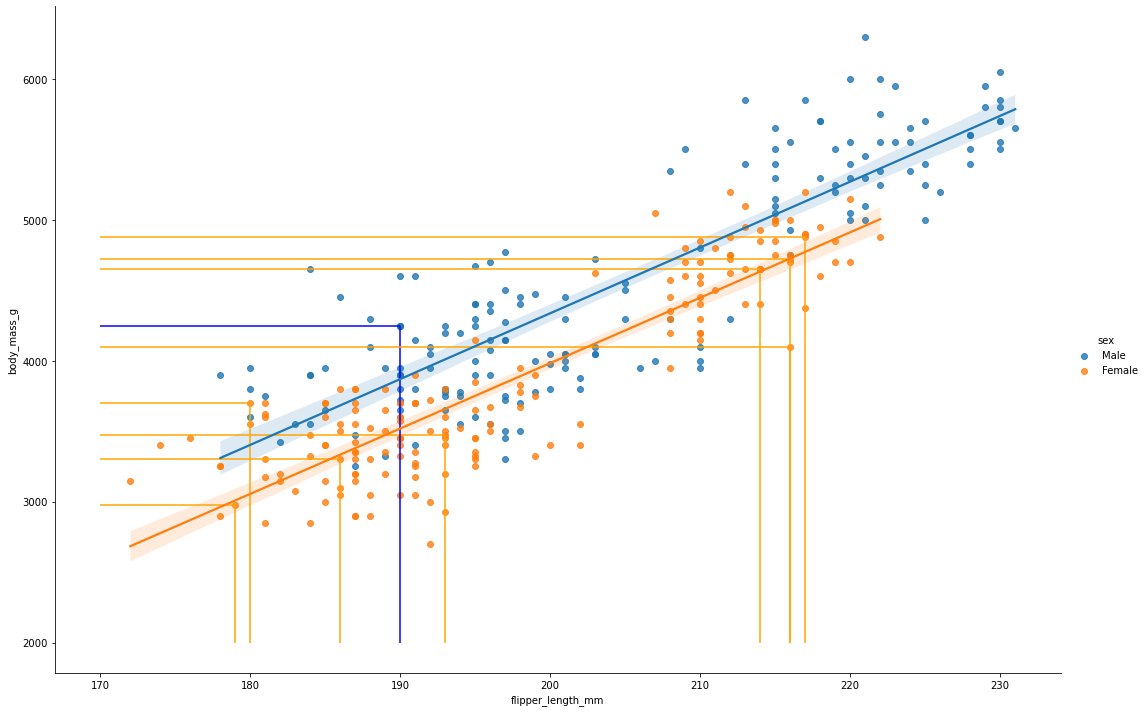

In [ ]:
plt.figure(figsize=(20,20))
sns.lmplot(
    data=df.dropna(),
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    aspect=(1.5),
    height=10
)

for i,ind in enumerate(df[sex_null].dropna().body_mass_g.index):
    plt.vlines(
        x=df[sex_null].flipper_length_mm[ind],
        ymax=df[sex_null].body_mass_g[ind],
        ymin=2000,
        colors='orange' if df[sex_null].numeric_sex[ind] == 1 else 'blue'
        )

    plt.hlines(
        y=df[sex_null].body_mass_g[ind],
        xmax=df[sex_null].flipper_length_mm[ind],
        xmin=170,
        colors='orange' if df[sex_null].numeric_sex[ind] == 1 else 'blue'
)